In [13]:
%matplotlib inline
import numpy as np
from numba import jit, cuda
import pandas as pd
import matplotlib.pyplot as plt

from typing import List
from random import randint

In [14]:
N = 50                  # size of array
SIZE = N * N
SWAPS = SIZE * SIZE * N     # amount of swaps cells

HAPPY_RATION = 2        # number of neighbors to be happy
OCCUPIED_RATION = 0.45  # occupied in percentages (separate for BLUE & RED)
VACANT_RATION = 0.1     # vacant places 

SCATTER_SIZE = N/10 * 2 # size of scatter

BLUE, RED, WHITE = 0, 1, -1 # value of colors
VACANT = WHITE


In [15]:
def pltcolor(arr: List) -> List:
    """Return list of point colors"""
    colors_set = {BLUE: 'blue', RED: 'red', VACANT: 'white'}
    colors = list()
    for item in arr:
        colors.append(colors_set.get(item))
    return colors


# @jit(target_backend='cuda')  
def relocation(arr: List):
    """Relocation """
    matrix = np.reshape(arr, (N, N))
    vacant = [[id//N, id%N] for id, value in enumerate(arr) if value == VACANT]
    for i in range(SWAPS):
        y = randint(0, N-1)
        x = randint(0, N-1)
        if matrix[y][x] != VACANT:
            neighbors = list()
            if y == 0:
                if x == 0:
                    neighbors.extend([matrix[y][x+1], matrix[y+1][x], matrix[y+1][x+1]])
                elif x == N-1:
                    neighbors.extend([matrix[y][x-1], matrix[y+1][x], matrix[y+1][x-1]])
                else:
                    neighbors.extend([matrix[y+1][x-1], matrix[y+1][x], matrix[y+1][x+1],
                                      matrix[y][x-1], matrix[y][x+1]])
            elif y == N-1:
                if x == 0:
                    neighbors.extend([matrix[y][x+1], matrix[y-1][x], matrix[y-1][x+1]])
                elif x == N-1:
                    neighbors.extend([matrix[y][x-1], matrix[y-1][x], matrix[y-1][x-1]])
                else:
                    neighbors.extend([matrix[y-1][x-1], matrix[y-1][x], matrix[y-1][x+1],
                                      matrix[y][x-1], matrix[y][x+1]])
            else:
                if x == 0:
                    neighbors.extend([matrix[y+1][x], matrix[y+1][x+1], matrix[y][x+1],
                                      matrix[y-1][x-1], matrix[y-1][x]])
                if x == N-1:
                    neighbors.extend([matrix[y+1][x], matrix[y+1][x-1], matrix[y][x-1],
                                      matrix[y-1][x-1], matrix[y-1][x]])
                else:
                    neighbors.extend([matrix[y+1][x+1], matrix[y+1][x], matrix[y+1][x-1],
                                      matrix[y-1][x+1], matrix[y-1][x], matrix[y-1][x-1],
                                      matrix[y][x+1], matrix[y][x-1]])
            
            if neighbors.count(matrix[y][x]) < HAPPY_RATION:
                vacant_y = vacant[0][0]
                vacant_x = vacant[0][1]
                
                arr[vacant_y*10 + vacant_x] = matrix[y][x]
                arr[y*10 + x] = matrix[y][x]
                
                matrix[vacant_y][vacant_x] = matrix[y][x]
                matrix[y][x] = VACANT

                vacant.pop(0)
                vacant.append([y, x])

In [16]:
array = np.zeros(SIZE, dtype=np.int8)
# Brilliant way to fill array
array[:int(SIZE*OCCUPIED_RATION)] = 1
array[-int(SIZE*VACANT_RATION):] = -1
np.random.shuffle(array)

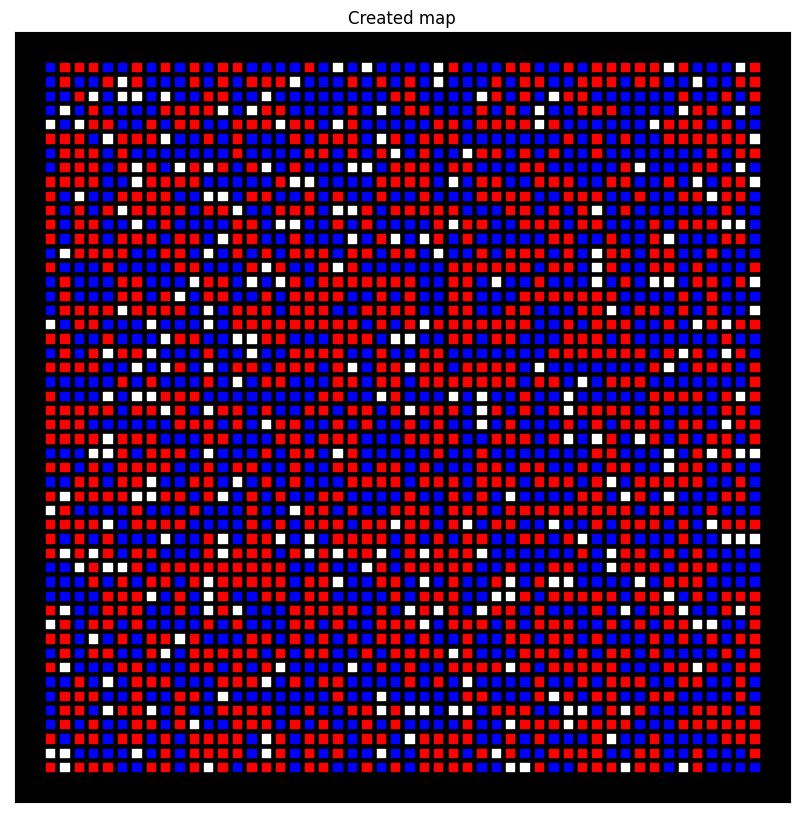

In [17]:
ox = [i for i in range(N)] * N
oy = [i//N for i in range(N*N)]
color_array = pltcolor(arr=array)

fig, ax = plt.subplots()
ax.scatter(x=ox, y=oy, marker='s', c=pltcolor(arr=array))

ax.set_facecolor('black')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig.set_figwidth(SCATTER_SIZE) 
fig.set_figheight(SCATTER_SIZE)
ax.set_title('Created map')

plt.show()

In [18]:
relocation(arr=array)


fig, ax = plt.subplots()
ax.scatter(x=ox, y=oy, marker='s', c=pltcolor(arr=array))
ax.set_facecolor('black')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig.set_figwidth(SCATTER_SIZE) 
fig.set_figheight(SCATTER_SIZE)
ax.set_title('Created map')

plt.show()